# Car Sales Dataset

In this project, we are going to be looking at a car sales dataset and performing an analysis on the data. The goal of this project is to acquire insight on the data and perform a multiple linear regression on the data to craete a model to best predict the sales.
The steps for the analysis are as follows:
- Extract, transform and load.
- Exploratory analysis.
- Employing the ML algorithm.

We shall now load the essential packages and also introduce plotly for interactive visualizations.

In [1]:
#Packages for the project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

#Ignore specific warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.plotting.backend = "plotly"
pio.templates.default = "simple_white"
sns.set(style = "white")
%matplotlib inline

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Now we commence the first part of the analysis which is **Extract, Transform and load**.

---
## Extract, Transfrom and Load
This part of the analysis makes the data usable in our environment, namely `Jupyter notebook`.
First, we load the data into a dataframe so as to manipulate it.

In [2]:
#Load the dataset used in the project
df_car = pd.read_csv('Car_sales.csv')
df_car.head()

,Manufacturer,Model,Sales_in_thousands,year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


We have loaded the data into our environment where we can freely use it. Now we will perform checks to the data before moving to the next step of the analsyis. 
Let's check the shape of the dataframe. 

In [3]:
#Dimensions in the data
df_car.shape

(157, 16)

The dataframe has 157 rows and 16 columns.

Let's examine the data more to get a more detailed overview.

In [4]:
#information on the columns
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   year_resale_value   121 non-null    float64
 4   Vehicle_type        157 non-null    object 
 5   Price_in_thousands  155 non-null    float64
 6   Engine_size         156 non-null    float64
 7   Horsepower          156 non-null    float64
 8   Wheelbase           156 non-null    float64
 9   Width               156 non-null    float64
 10  Length              156 non-null    float64
 11  Curb_weight         155 non-null    float64
 12  Fuel_capacity       156 non-null    float64
 13  Fuel_efficiency     154 non-null    float64
 14  Latest_Launch       157 non-null    object 
 15  Power_perf_factor   155 non-null    float64
dtypes: float

From the information above, there are a few things I would like to change before moving on, namely:
- Get and deal with missing values.
- Change the column names to a more useful format.
- Change the data type for **Latest launch** to date format.

Let's see how many values are missing.

In [5]:
#Check for missing values
df_car.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
year_resale_value     36
Vehicle_type           0
Price_in_thousands     2
Engine_size            1
Horsepower             1
Wheelbase              1
Width                  1
Length                 1
Curb_weight            2
Fuel_capacity          1
Fuel_efficiency        3
Latest_Launch          0
Power_perf_factor      2
dtype: int64

Before proceeding with dealing with the missing values, we shall deal with the **column names**.

In [6]:
#Change column names to a better form to manipulate
df_car.columns = [x.lower().strip() for x in df_car.columns]
df_car.columns

Index(['manufacturer', 'model', 'sales_in_thousands', 'year_resale_value',
       'vehicle_type', 'price_in_thousands', 'engine_size', 'horsepower',
       'wheelbase', 'width', 'length', 'curb_weight', 'fuel_capacity',
       'fuel_efficiency', 'latest_launch', 'power_perf_factor'],
      dtype='object')

Change the data type for **Latest Launch**.

In [7]:
#Change the date data type
df_car.latest_launch = pd.to_datetime(df_car.latest_launch)

I will remove the missing values from the dataset.

In [8]:
df_car.dropna(inplace  = True)

Below moving to exploratory analysis, we shall check if the changes have taken effect.

In [9]:
df_car.isnull().sum()

manufacturer          0
model                 0
sales_in_thousands    0
year_resale_value     0
vehicle_type          0
price_in_thousands    0
engine_size           0
horsepower            0
wheelbase             0
width                 0
length                0
curb_weight           0
fuel_capacity         0
fuel_efficiency       0
latest_launch         0
power_perf_factor     0
dtype: int64

In [10]:
df_car.shape

(117, 16)

In [11]:
df_car.describe()

,sales_in_thousands,year_resale_value,price_in_thousands,engine_size,horsepower,wheelbase,width,length,curb_weight,fuel_capacity,fuel_efficiency,power_perf_factor
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,59.112316,18.031538,25.969487,3.048718,181.282051,107.326496,71.189744,187.717949,3.324051,17.812821,24.119658,74.930921
std,75.058933,11.605632,14.149699,1.055169,58.591786,8.050588,3.530151,13.849926,0.597177,3.794609,4.404470,25.771796
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,16.767000,11.240000,16.980000,2.200000,140.000000,102.400000,68.500000,177.500000,2.911000,15.300000,22.000000,55.297117
50%,32.299000,14.010000,21.665000,3.000000,175.000000,107.000000,70.400000,187.800000,3.340000,17.200000,24.000000,70.660942
75%,76.029000,19.875000,29.465000,3.800000,210.000000,111.600000,73.600000,196.500000,3.823000,19.800000,26.000000,85.828408
max,540.561000,67.550000,82.600000,8.000000,450.000000,138.700000,79.300000,224.500000,5.115000,32.000000,45.000000,188.144323


In [12]:
#check the data type
df_car.dtypes

manufacturer                  object
model                         object
sales_in_thousands           float64
year_resale_value            float64
vehicle_type                  object
price_in_thousands           float64
engine_size                  float64
horsepower                   float64
wheelbase                    float64
width                        float64
length                       float64
curb_weight                  float64
fuel_capacity                float64
fuel_efficiency              float64
latest_launch         datetime64[ns]
power_perf_factor            float64
dtype: object

All checks seem to pass, so we move forward to the next step.

---
## Exploratory analysis

The first step is to check how much each manufacturer made in sales.

In [13]:
sales_by_manufacturer = df_car.groupby('manufacturer').agg({'sales_in_thousands':'sum'}).sort_values(by = 'sales_in_thousands', ascending = False)
sales_by_manufacturer.reset_index(inplace = True)
sales_by_manufacturer

,manufacturer,sales_in_thousands
0,Ford,1846.965
1,Dodge,720.798
2,Toyota,675.086
3,Honda,592.674
4,Chevrolet,446.370
5,Pontiac,330.962
6,Jeep,293.153
7,Nissan,280.472
8,Buick,242.019
9,Mercury,237.999


Let's visualize the data above to get a quick analysis.

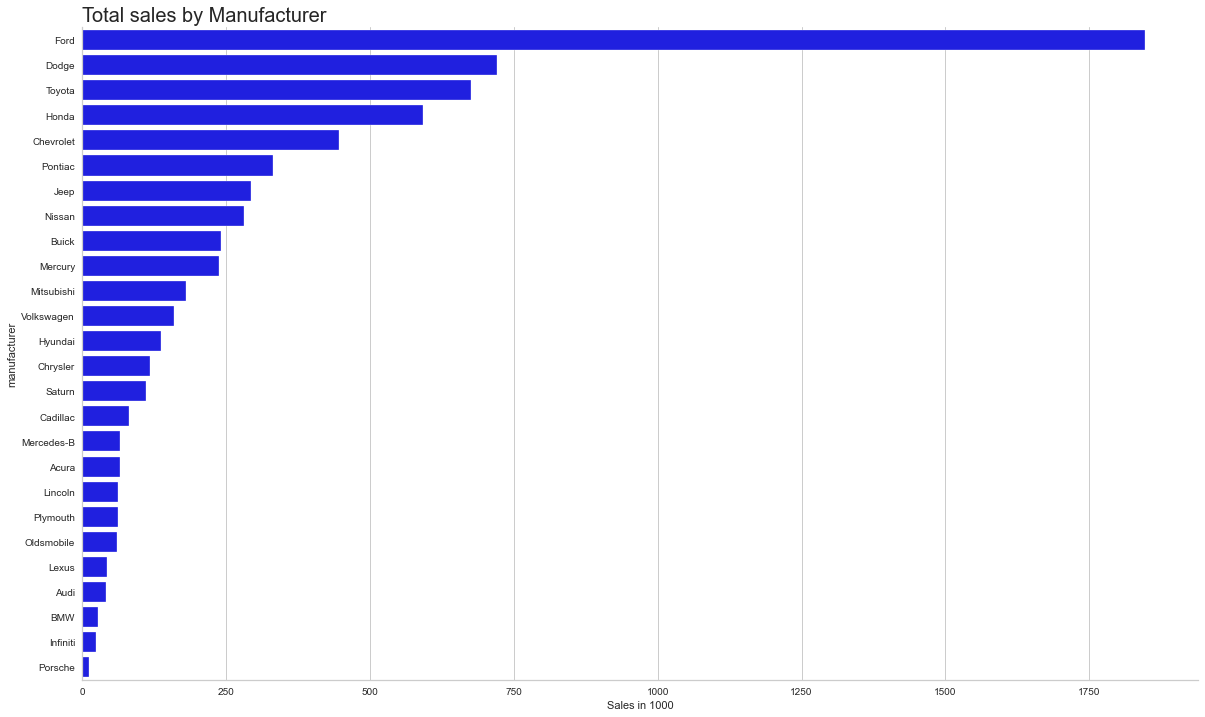

In [73]:
fig, ax = plt.subplots(figsize = (20,12))
sns.barplot(y = 'manufacturer', x = 'sales_in_thousands', data = sales_by_manufacturer, color = 'blue', ax = ax)
ax.set_xlabel('Sales in 1000')
ax.set_title('Total sales by Manufacturer', fontdict={'fontsize' : 20}, loc = 'left')
sns.despine(right = True, top = True)

From the bar chart, **Ford** generated the most sales by a significant amount. 

Due to the manufacturer having different models, we shall graph the sales of particular models and manufacturer.

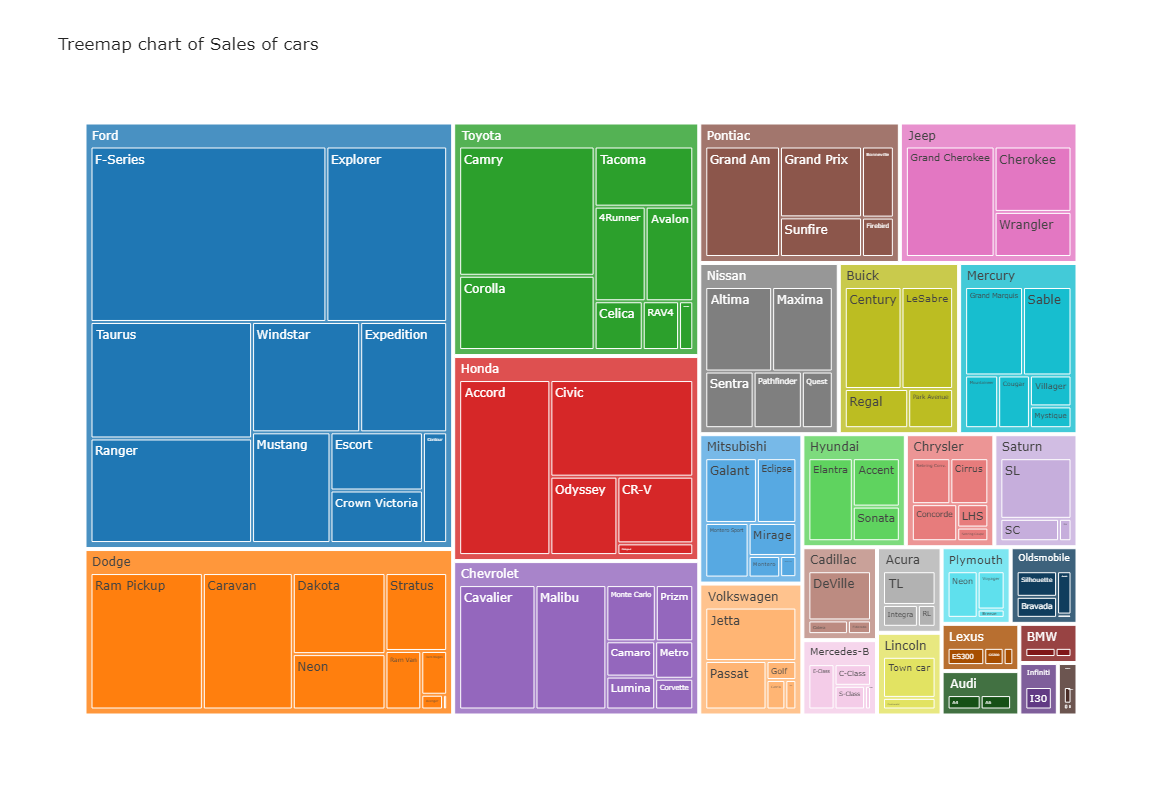

In [78]:
# Sunburst chart of the sales of the cars
fig = px.treemap(df_car, path = ['manufacturer','model'], values = 'sales_in_thousands', height = 800, width = 1100,title = 'Treemap chart of Sales of cars')
fig.show()

From the graph, we can see that the **Ford F-series** generated the most in sales.

Now we shall study the sales made by different vehicles type.

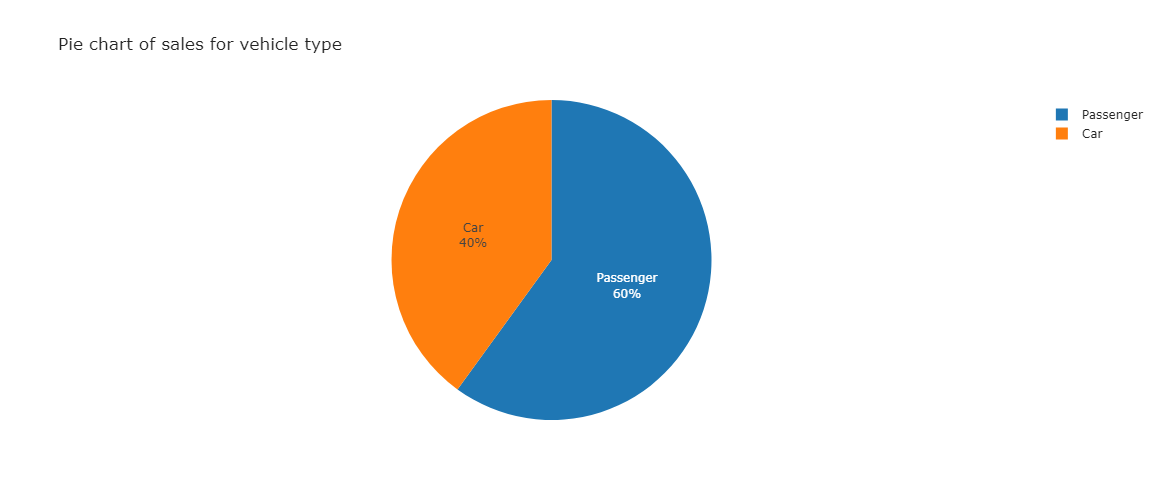

In [16]:
fig = px.pie(df_car, values = 'sales_in_thousands', names = 'vehicle_type', title = 'Pie chart of sales for vehicle type', height = 500, width = 800)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

From the pie chart, the passenger vehicle type made more in sales than the regular car.

Create a correlation matrix to see how different features relate to each other.

In [17]:
corr = df_car.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,sales_in_thousands,year_resale_value,price_in_thousands,engine_size,horsepower,wheelbase,width,length,curb_weight,fuel_capacity,fuel_efficiency,power_perf_factor
sales_in_thousands,1.000000,-0.275426,-0.251705,0.038111,-0.152538,0.406839,0.177802,0.272336,0.067184,0.138045,-0.066927,-0.175562
year_resale_value,-0.275426,1.000000,0.954757,0.527187,0.773110,-0.053685,0.178128,0.025390,0.363274,0.324796,-0.398459,0.829511
price_in_thousands,-0.251705,0.954757,1.000000,0.649170,0.853455,0.067042,0.301292,0.182592,0.511400,0.406496,-0.479539,0.905002
engine_size,0.038111,0.527187,0.649170,1.000000,0.861618,0.410020,0.671756,0.537343,0.742831,0.616862,-0.724871,0.841005
horsepower,-0.152538,0.773110,0.853455,0.861618,1.000000,0.225905,0.507275,0.400968,0.598603,0.479790,-0.595844,0.994071
wheelbase,0.406839,-0.053685,0.067042,0.410020,0.225905,1.000000,0.675559,0.853669,0.675609,0.658654,-0.470455,0.200228
width,0.177802,0.178128,0.301292,0.671756,0.507275,0.675559,1.000000,0.743226,0.735957,0.672191,-0.599604,0.478889
length,0.272336,0.025390,0.182592,0.537343,0.400968,0.853669,0.743226,1.000000,0.684305,0.562504,-0.465682,0.366831
curb_weight,0.067184,0.363274,0.511400,0.742831,0.598603,0.675609,0.735957,0.684305,1.000000,0.847994,-0.818819,0.597586
fuel_capacity,0.138045,0.324796,0.406496,0.616862,0.479790,0.658654,0.672191,0.562504,0.847994,1.000000,-0.808506,0.478484


Lastly, create a pairplot to see how the features are distributed.

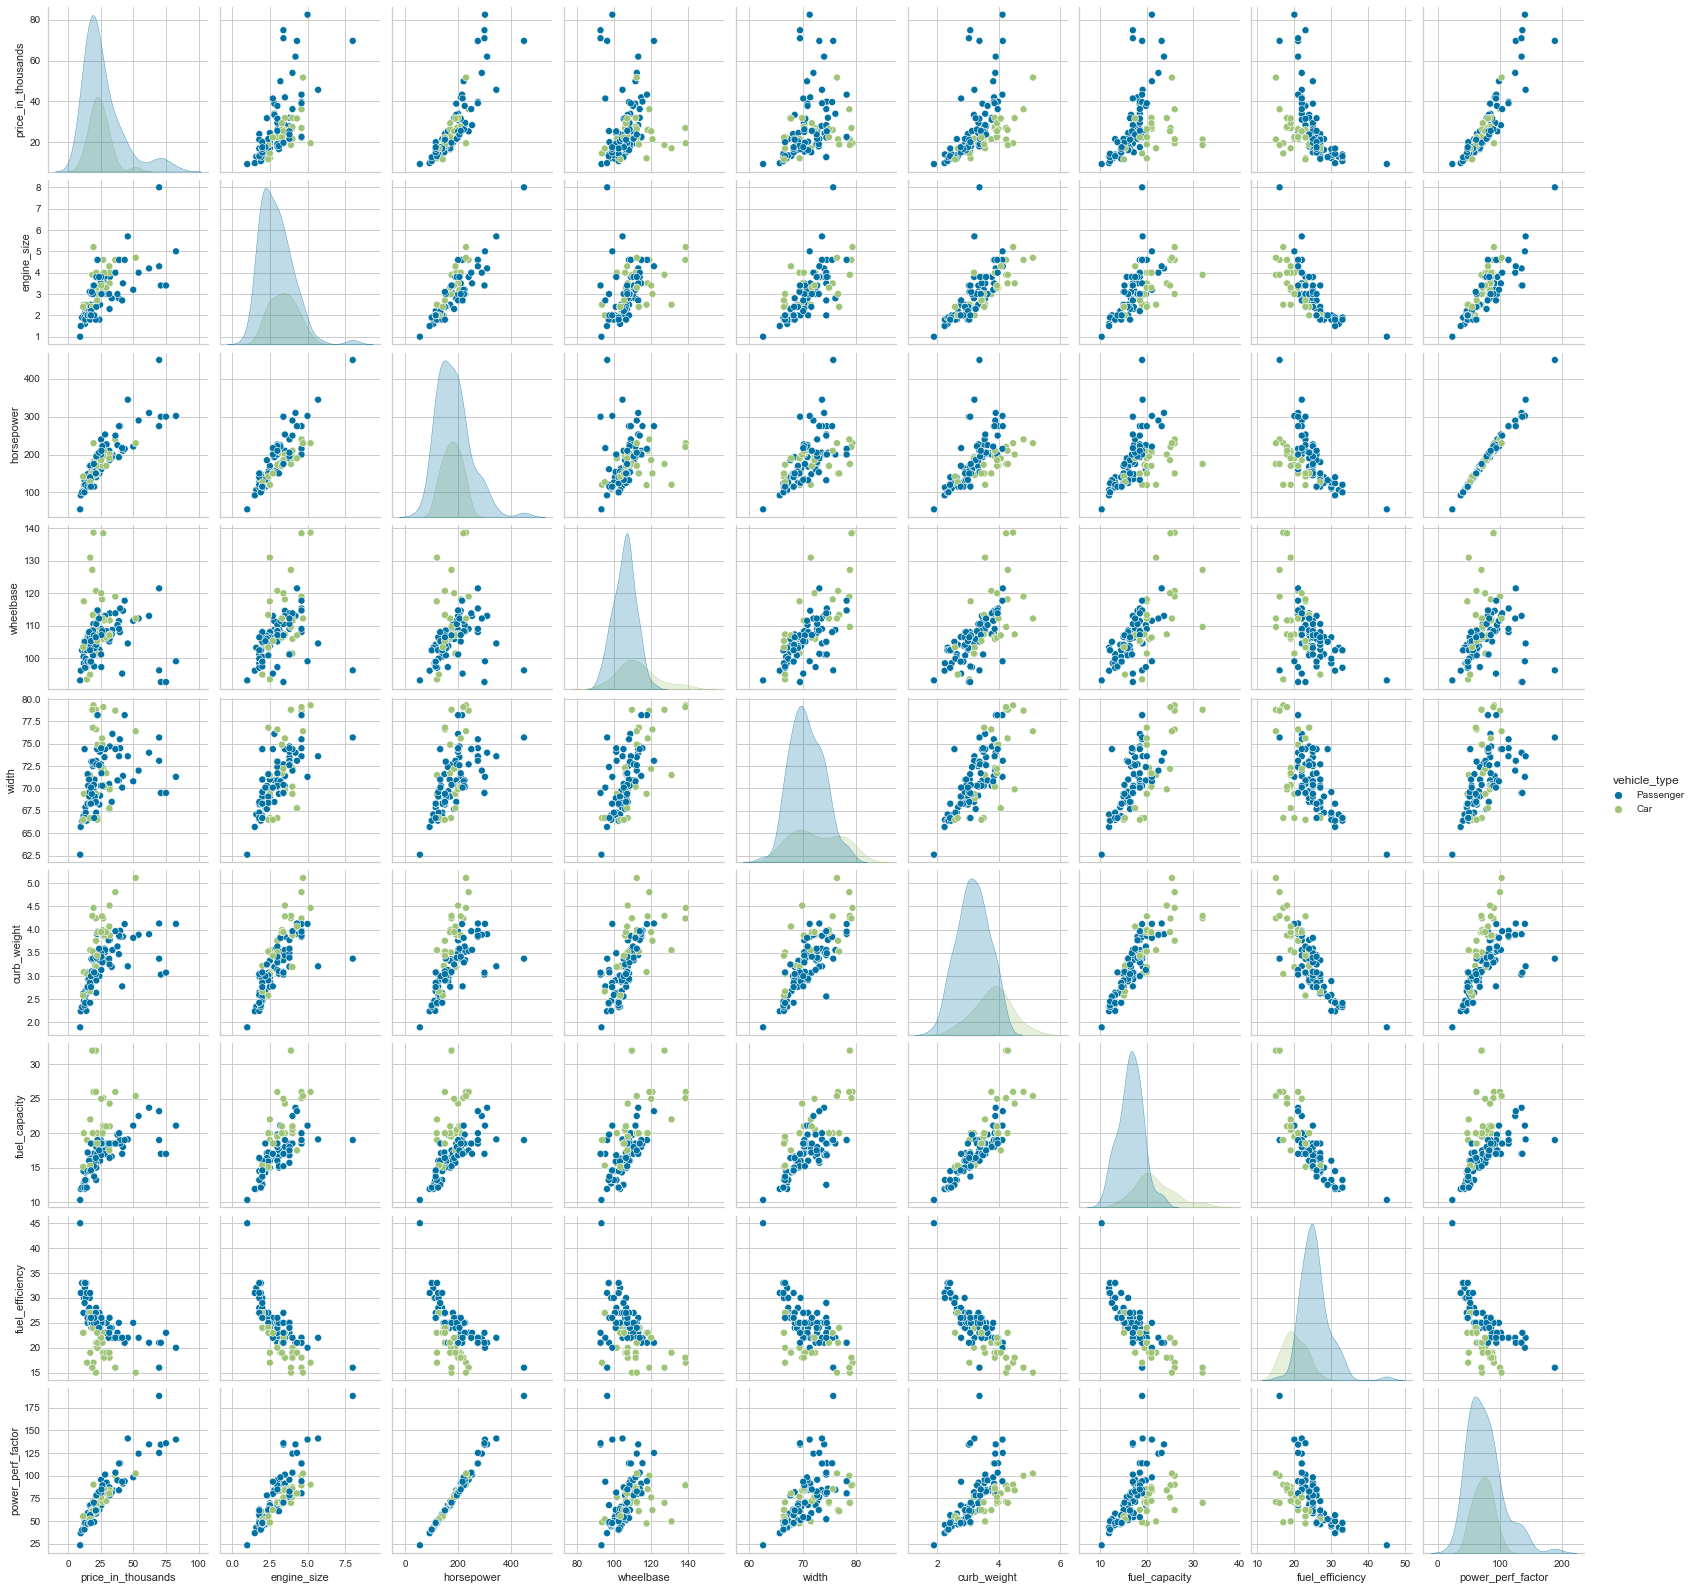

In [82]:
sns.pairplot(data = df_car, vars = ['price_in_thousands','engine_size','horsepower','wheelbase','width','curb_weight','fuel_capacity','fuel_efficiency','power_perf_factor'],
             hue = 'vehicle_type')

---
## Machine learning algorithm

We shall now use machine learning techniques to learn how the price is determined using the features that we have.

We will split the data into the target variable and independent features.

In [30]:
features = df_car[['engine_size','horsepower','wheelbase','width','curb_weight','fuel_capacity','fuel_efficiency','power_perf_factor','vehicle_type']]
price = df_car[['price_in_thousands']]

In [31]:
features

,engine_size,horsepower,wheelbase,width,curb_weight,fuel_capacity,fuel_efficiency,power_perf_factor,vehicle_type
0,1.8,140.0,101.2,67.3,2.639,13.2,28.0,58.280150,Passenger
1,3.2,225.0,108.1,70.3,3.517,17.2,25.0,91.370778,Passenger
3,3.5,210.0,114.6,71.4,3.850,18.0,22.0,91.389779,Passenger
4,1.8,150.0,102.6,68.2,2.998,16.4,27.0,62.777639,Passenger
5,2.8,200.0,108.7,76.1,3.561,18.5,22.0,84.565105,Passenger
...,...,...,...,...,...,...,...,...,...
145,2.0,115.0,98.9,68.3,2.767,14.5,26.0,46.943877,Passenger
146,2.0,115.0,98.9,68.3,2.853,14.5,26.0,47.638237,Passenger
147,1.8,150.0,106.4,68.5,3.043,16.4,27.0,61.701381,Passenger
148,2.0,115.0,97.4,66.7,3.079,13.7,26.0,48.907372,Passenger


In [32]:
price['price_in_thousands'] = car_sales['price_in_thousands']*1000
price

,price_in_thousands
0,21500.0
1,28400.0
3,42000.0
4,23990.0
5,33950.0
...,...
145,14900.0
146,16700.0
147,21200.0
148,19990.0


Encode the **vehicle type** column and remove the original column.

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features['vehicle_type_cat'] = le.fit_transform(features.vehicle_type)
features.drop('vehicle_type', axis = 1, inplace = True)
features

,engine_size,horsepower,wheelbase,width,curb_weight,fuel_capacity,fuel_efficiency,power_perf_factor,vehicle_type_cat
0,1.8,140.0,101.2,67.3,2.639,13.2,28.0,58.280150,1
1,3.2,225.0,108.1,70.3,3.517,17.2,25.0,91.370778,1
3,3.5,210.0,114.6,71.4,3.850,18.0,22.0,91.389779,1
4,1.8,150.0,102.6,68.2,2.998,16.4,27.0,62.777639,1
5,2.8,200.0,108.7,76.1,3.561,18.5,22.0,84.565105,1
...,...,...,...,...,...,...,...,...,...
145,2.0,115.0,98.9,68.3,2.767,14.5,26.0,46.943877,1
146,2.0,115.0,98.9,68.3,2.853,14.5,26.0,47.638237,1
147,1.8,150.0,106.4,68.5,3.043,16.4,27.0,61.701381,1
148,2.0,115.0,97.4,66.7,3.079,13.7,26.0,48.907372,1


Split the data into train and test data

In [35]:
from sklearn.model_selection import train_test_split
features_train, features_test, price_train, price_test = train_test_split(features, price, test_size = 0.1, random_state = 180)

Feature selection using `YellowBrick`

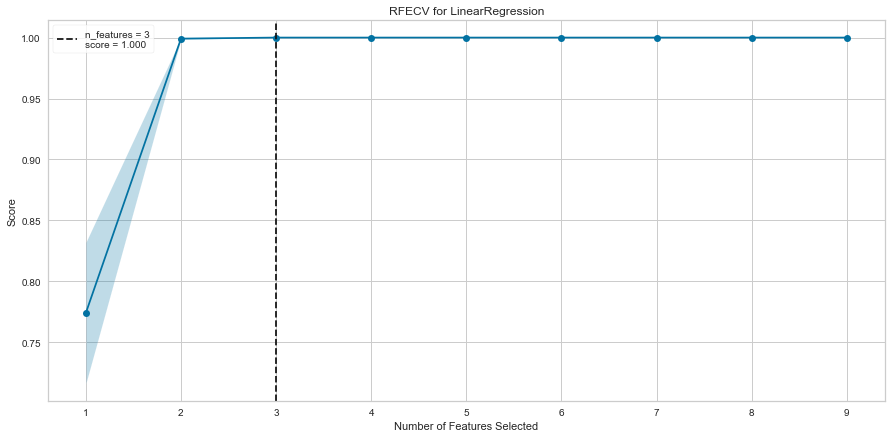

<AxesSubplot:title={'center':'RFECV for LinearRegression'}, xlabel='Number of Features Selected', ylabel='Score'>

In [59]:
from sklearn.linear_model import LinearRegression
from yellowbrick.model_selection import RFECV

fig, ax = plt.subplots(figsize = (15,7))

viz = RFECV(LinearRegression(), ax = ax)
viz.fit(features_train, price_train)
viz.show()

Create a linear regression to use as a model.

In [49]:
reg = LinearRegression()
reg.fit(features_train, price_train)

LinearRegression()

Evaluate the model created above.

In [52]:
from sklearn import metrics

pred = reg.predict(features_test)
r2 = metrics.r2_score(price_test, pred)
mse = metrics.mean_squared_error(price_test, pred)

print(f'R^2 score = {r2:.3f}')
print(f'Mean Squared error = {mse:.2f}')

R^2 score = 1.000
Mean Squared error = 0.00


The model seems to be predicting the price of cars very accurately.

Create a residual plot to further evaluate the model.

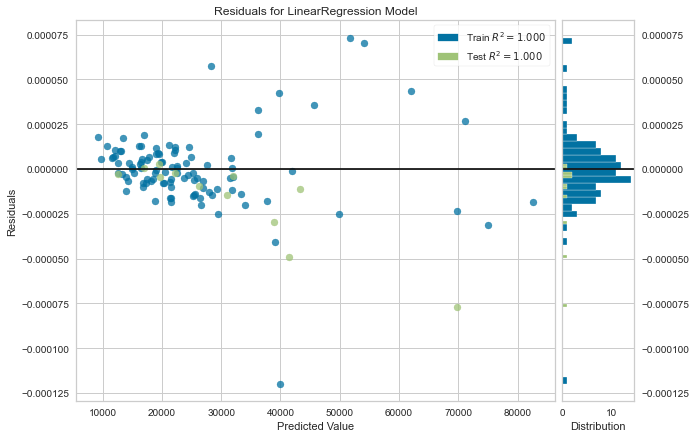

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [58]:
from yellowbrick.regressor import ResidualsPlot

fig, ax = plt.subplots(figsize = (10,7))
visualizer = ResidualsPlot(LinearRegression(), ax = ax)
visualizer.fit(features_train, price_train)
visualizer.score(features_test, price_test)
visualizer.show()

Use `statsmodel.api` to get a deeper understanding of the model.

In [63]:
import statsmodels.formula.api as sm

formula = 'price_in_thousands ~ engine_size + horsepower + power_perf_factor'
model = sm.ols(formula, data = df_car)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     price_in_thousands   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.566e+19
Date:                Wed, 14 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:48:24   Log-Likelihood:                 1897.8
No. Observations:                 117   AIC:                            -3788.
Df Residuals:                     113   BIC:                            -3776.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.844e-08   7.43e-09      2.482      0.015    3.72e-09    3.32e-08
engine_size          -0.6754   4.02e-09  -1.68e+08      0.000      -0.675      -0.675
horsepower           -0.9169    3.6e-10  -2.55e+09      0.000      -0.917      -0.917
power_perf_factor     2.5923   7.67e-10   3.38e+09      0.000       2.592       2.592
==============================================================================
Omnibus:                       31.582   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              360.325
Skew:                           0.267   Prob(JB):                     5.71e-79
Kurtosis:                      11.581   Cond. No.                         746.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Use `Ridge Regression` residual plot to see if the results are reproduced in other machine learning algorithms. 

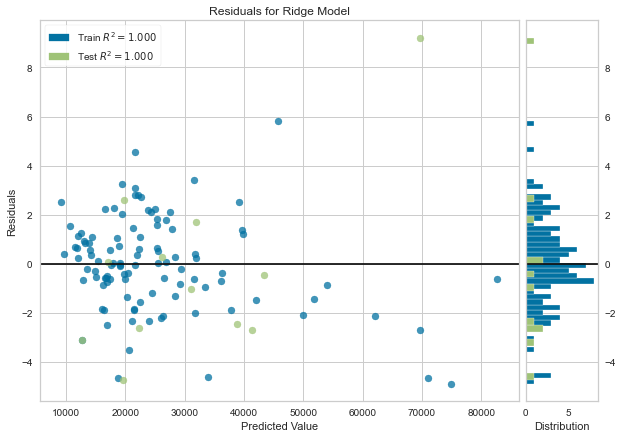

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [69]:
from sklearn.linear_model import Ridge

fig, ax = plt.subplots(figsize = (10,7))
visualizer = ResidualsPlot(Ridge(alpha = 0.1), ax = ax)
visualizer.fit(features_train, price_train)
visualizer.score(features_test, price_test)
visualizer.show()

---
## Conclusion

The models created perfectly fit the data. For this data, the price can be learn't by the multiple linear regression.